number of examples:  260179
size of train 208143 size of dev 26018 size of test 26018
[0, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379]
11.239598989486694 seconds have passed


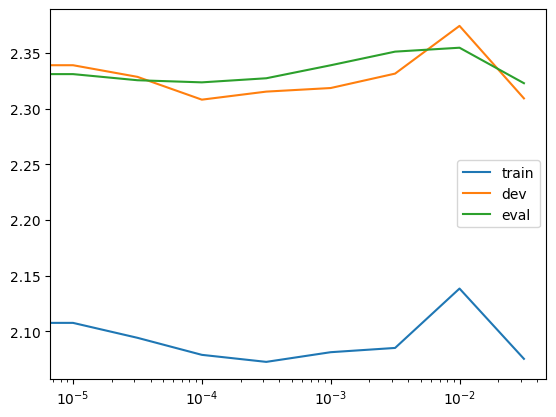

In [20]:
### start of solution 

from torch import nn
import torch
from matplotlib import pyplot as plt
import numpy as np
import time as time

device = torch.device("mps")
# device = torch.device("mps") # training on mac comp, unccomment if you are too with latest nightly pytorch library
words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

xs, ys = [], []
for w in words:
    chs = ['.']*2 + list(w) + ['.']*2
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        xs.append(stoi[ch1]*27 + stoi[ch2])
        ys.append(stoi[ch3])

xs = torch.tensor(xs, device = device)        
ys = torch.tensor(ys, device = device)

num = ys.nelement()
## split into train, dev and eval
xs_train = xs[:(int)(num*0.8)]
ys_train = ys[:(int)(num*0.8)]
 
xs_dev = xs[(int)(num*0.8):(int)(num*0.9)]
ys_dev = ys[(int)(num*0.8):(int)(num*0.9)]

xs_eval = xs[(int)(num*0.9):]
ys_eval = ys[(int)(num*0.9):]
print('number of examples: ', num)
print(f"size of train {len(xs_train)} size of dev {len(xs_dev)} size of test {len(xs_eval)}")
#### trigram model with indexing
g = torch.Generator().manual_seed(2147483647)
curr = time.time()
def get_loss(x, y, W, reg):
    logits = W[x,:]
    cel = nn.CrossEntropyLoss()
    loss = cel(logits, y) + reg*(W**2).mean()
    return loss

def get_weights(xs, ys, reg):
    
    # initialize the 'network'
    W = torch.randn((27*27, 27), generator=g, requires_grad=True, device = device)
    for k in range(0,50):
        loss = get_loss(xs, ys, W, reg)
        # backward pass
        W.grad = None # set to zero the gradient
        loss.backward()
        # update
        W.data += -200 * W.grad
    return W

weights = [0] + [10.0**x for x in np.arange(-5,-1,0.5)]
print(weights)
train_losses = []
dev_losses = []
eval_losses = []
for weight in weights:
    W = get_weights(xs_train, ys_train, weight)
    dev_losses.append(get_loss(xs_dev, ys_dev, W, 0).item())
    train_losses.append(get_loss(xs_train, ys_train, W, 0).item())
    eval_losses.append(get_loss(xs_eval, ys_eval, W, 0).item())
print(f"{time.time() - curr} seconds have passed")
plt.plot(weights, train_losses, label = 'train')
plt.plot(weights, dev_losses, label = 'dev')
plt.plot(weights, eval_losses, label = 'eval')
plt.legend()
plt.xscale("log")
                                            

In [25]:
import random
random.sample([4,1,4], replacement = False)

TypeError: Random.sample() got an unexpected keyword argument 'replacement'

In [14]:
# finally, sample from the 'neural net' model
# g = torch.Generator().manual_seed(2147483647)
W = get_weights(xs_train, ys_train, 0.01)
for i in range(10):
  
  out = []
  first_ix = 0
  second_ix = 0
  while True:
    ix = first_ix*27 + second_ix
    logits = W[ix,:]
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum()# probabilities for next character
    # ----------

    sampled_ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[sampled_ix])
    first_ix = second_ix
    second_ix = sampled_ix
    if sampled_ix == 0:
      break
  print(''.join(out))

bafmyvi.
cafutenalaree.
rahndeson.
jana.
josedsfhopxxilea.
bradiihineth.
kiya.
makyladaictzinufnn.
li.
charsbmgzsty.
